In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# Loading data function for function2
def load_data():
    A = np.loadtxt("data/fun2_A.txt").reshape((500, 100))
    b = np.loadtxt("data/fun2_b.txt").reshape(-1, 1)
    c = np.loadtxt("data/fun2_c.txt").reshape(-1, 1)
    return A, b, c


# Initialize coefficient and start point
A, b, c = load_data()
x0_f1 = np.random.rand(100)
x0_f2 = np.abs(np.random.rand(100))
x0_f3 = np.array([0.0, 0.0])

# Define three functions: 

In [92]:
# Define function1
def function1(x):
    return np.sum(np.arange(1, len(x) + 1) * x**2)


def grad_function1(x):
    return 2 * np.arange(1, len(x) + 1) * x

In [93]:
# Define function2
def function2(x, A, b, c):
    Ax = A @ x
    return c.T @ x - np.sum(np.log(np.clip(b.flatten() - Ax, 1e-8, None)))


def grad_function2(x, A, b, c):
    Ax = A @ x
    term = 1 / (b.flatten() - Ax)
    return c.flatten() + A.T @ term


def hessian_function2(x, A, b):
    Ax = A @ x
    D = np.diagflat(1 / np.clip((b.flatten() - Ax) ** 2, 1e-10, None))
    H = A.T @ D @ A
    H += 1e-6 * np.eye(H.shape[0])
    return H

In [94]:
# Define function3
def function3(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2


def grad_function3(x):
    return np.array(
        [-400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0]), 200 * (x[1] - x[0] ** 2)]
    )


def hessian_function3(x):
    return np.array(
        [[1200 * x[0] ** 2 - 400 * x[1] + 2, -400 * x[0]], [-400 * x[0], 200]]
    )

# Gradient Descent method: 

In [95]:
# Optimization method 1: GD
def gradient_descent(func, grad_func, x0, alpha=0.001, tol=1e-6, max_iter=200):
    x = x0
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        history.append(func(x))
        x = x - alpha * grad
        if np.linalg.norm(grad) < tol:
            break
    return x, history

# Newton method: 

In [96]:
def line_search_newton(func, x, p, grad, alpha=1.0, c1=1e-4, rho=0.9):
    while func(x + alpha * p) > func(x) + c1 * alpha * np.dot(grad, p):
        alpha *= rho
    return alpha


# Optimization method 2: Newton
def newton_method(func, grad_func, hess_func, x0, tol=1e-6, max_iter=200):
    x = x0
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        hess = hess_func(x)
        history.append(func(x))
        try:
            p = -np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            print(f"Iteration {i}: Stopping because Hessian is singular.")
            break
        alpha = line_search_newton(func, x, p, grad)
        x = x + alpha * p
        if np.linalg.norm(grad) < tol:
            break
    return x, history

# Quasi-Newton method: 

In [97]:
def line_search(func, grad_func, x, p, alpha=1.0, c1=1e-4, rho=0.9):
    while func(x + alpha * p) > func(x) + c1 * alpha * np.dot(grad_func(x), p):
        alpha *= rho
    return alpha


def quasi_newton(func, grad_func, x0, tol=1e-4, max_iter=200):
    x = x0
    n = len(x0)
    I = np.eye(n)
    H = I
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        history.append(func(x))
        if np.linalg.norm(grad) < tol:
            print(f"Converged in {i} iterations")
            break
        p = -H @ grad
        alpha = line_search(func, grad_func, x, p)
        x_new = x + alpha * p
        s = x_new - x
        y = grad_func(x_new) - grad
        ys = y @ s
        if ys < 1e-10:
            print("Warning.")
            break
        rho = 1.0 / ys
        H = (I - rho * np.outer(s, y)) @ H @ (
            I - rho * np.outer(y, s)
        ) + rho * np.outer(s, s)
        x = x_new
    return x, history

# SignGD: 

In [98]:
# Optimization method 4: SignGD
def signgd(func, grad_func, x0, alpha=0.01, tol=1e-6, max_iter=200):
    x = x0
    history = []
    for i in range(max_iter):
        grad = grad_func(x)
        history.append(func(x))
        x = x - alpha * np.sign(grad)
        if np.linalg.norm(grad) < tol:
            break
    return x, history

Function1 Results:
Gradient Descent: [7.95280999e-01 6.34228352e-01 4.37380671e-01 1.07486721e-01
 4.75637855e-02 2.09377021e-01 2.49794641e-02 4.32770637e-02
 2.16978112e-02 3.44650690e-02 2.14846941e-02 1.68177081e-02
 5.57322656e-02 5.28978361e-02 7.54702324e-03 2.65107829e-02
 2.14690981e-02 6.10734655e-03 2.00917684e-02 1.38082550e-02
 5.56732072e-03 4.73122930e-03 8.50716983e-03 5.03696635e-03
 6.60235520e-04 4.50925748e-03 5.92114640e-04 4.98575655e-04
 3.90453695e-04 2.24243987e-04 2.75226413e-04 7.46715399e-04
 1.93901284e-04 3.75518714e-05 1.86725751e-04 5.66167434e-04
 4.37686273e-04 2.65652090e-04 8.47899445e-05 7.84623338e-05
 1.04545763e-04 1.10321347e-04 7.68597680e-05 8.32826302e-05
 1.96235915e-05 4.19307999e-05 2.44589759e-06 1.90655400e-05
 3.31112323e-05 1.98993258e-05 1.41074419e-05 7.83694171e-06
 7.13264937e-06 4.30678561e-06 8.37140484e-07 5.90582147e-06
 2.24042689e-06 3.63999321e-07 2.99437716e-06 1.18567870e-06
 1.22890344e-06 1.34392742e-06 6.16715759e-07 9.

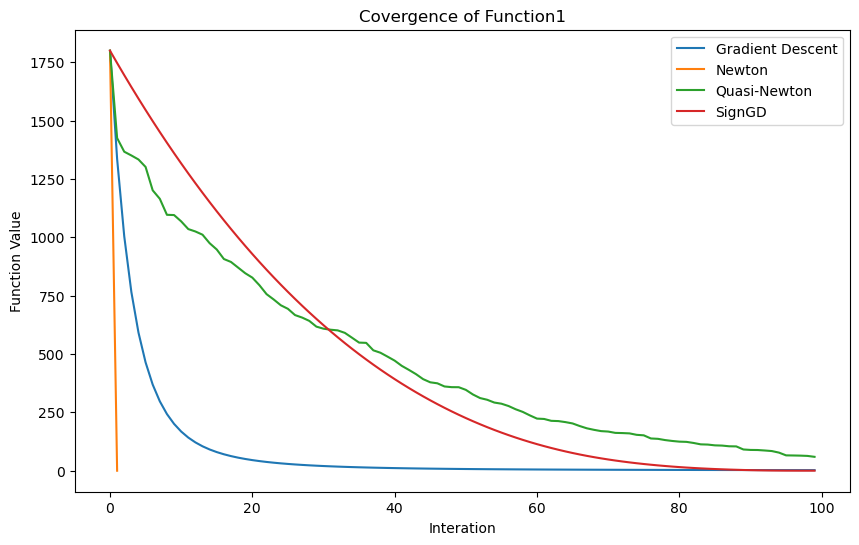

In [99]:
# ----- Function1 -----
max_iteration = 100
gd_result_f1, gd_history_f1 = gradient_descent(
    function1, grad_function1, x0_f1, max_iter=max_iteration
)
newton_result_f1, newton_history_f1 = newton_method(
    function1,
    grad_function1,
    lambda x: 2 * np.diag(np.arange(1, len(x) + 1)),
    x0_f1,
    max_iter=max_iteration,
)
quasi_newton_result_f1, quasi_newton_history_f1 = quasi_newton(
    function1, grad_function1, x0_f1, max_iter=max_iteration
)
signgd_result_f1, signgd_history_f1 = signgd(
    function1, grad_function1, x0_f1, max_iter=max_iteration
)

print("Function1 Results:")
print("Gradient Descent:", gd_result_f1)
print("Newton:", newton_result_f1)
print("Quasi-Newton:", quasi_newton_result_f1)
print("SignGD:", signgd_result_f1)

# Plot for function1
plt.figure(figsize=(10, 6))
plt.plot(gd_history_f1, label="Gradient Descent")
plt.plot(newton_history_f1, label="Newton")
plt.plot(quasi_newton_history_f1, label="Quasi-Newton")
plt.plot(signgd_history_f1, label="SignGD")
plt.xlabel("Interation")
plt.ylabel("Function Value")
plt.title("Covergence of Function1")
plt.legend()
plt.show()

Warning.
Function2 Results:
Gradient Descent: [ 0.28005331  0.0812547   1.20877679  0.02192489  0.13293223  0.67612856
  0.01690242  0.03891887  0.29742613  0.20315321  0.56585445  0.23867075
 -0.00527169  0.03697067  0.05559519  0.58096981  0.62104004 -0.01017875
  0.1596866   0.25538774  0.66956303  0.5649884   0.50970505  0.40600925
  0.40783517  0.02248463  0.00709872  0.10730776  0.73981388  0.52624622
  0.67516681  1.10185638  0.85938175  0.72943552  1.4095371   0.15045184
  0.2551024   0.57953662  0.58224884  0.44056245  0.36819828  0.89131732
  0.44151759  0.54456397  0.69709249  0.54152507  0.06631165  0.45954342
 -0.11164474  0.70489894  0.61367903  0.7614397   0.83758749  0.45845277
  0.68267361  0.63058655  0.11858273  0.57435563  0.18931035 -0.15740777
  0.77481516  0.57014086  0.61184505  0.7330725  -0.1410563   0.1485798
  0.51486147  0.53386153  0.77137861  0.50200749  0.74740404  0.12382345
  0.82317668 -0.09411192  0.99093729  0.75945552  0.95969652  0.38085331
  0.69

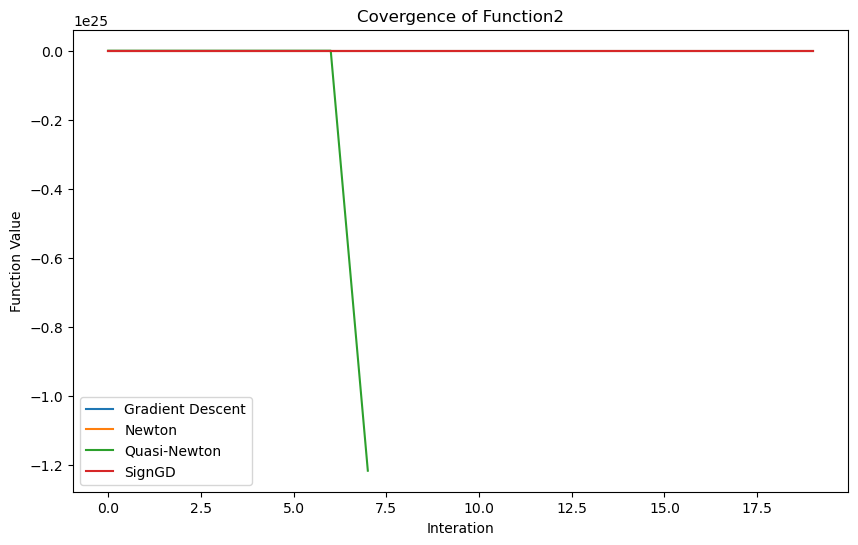

In [100]:
# ----- Function2 -----
gd_result_f2, gd_history_f2 = gradient_descent(
    lambda x: function2(x, A, b, c),
    lambda x: grad_function2(x, A, b, c),
    x0_f2,
    max_iter=20,
)
newton_result_f2, newton_history_f2 = newton_method(
    lambda x: function2(x, A, b, c),
    lambda x: grad_function2(x, A, b, c),
    lambda x: hessian_function2(x, A, b),
    x0_f2,
    max_iter=20,
)
quasi_newton_result_f2, quasi_newton_history_f2 = quasi_newton(
    lambda x: function2(x, A, b, c),
    lambda x: grad_function2(x, A, b, c),
    x0_f2,
    max_iter=20,
)
signgd_result_f2, signgd_history_f2 = signgd(
    lambda x: function2(x, A, b, c),
    lambda x: grad_function2(x, A, b, c),
    x0_f2,
    max_iter=20,
)

print("Function2 Results:")
print("Gradient Descent:", gd_result_f2)
print("Newton:", newton_result_f2)
print("QuasiNewton:", quasi_newton_result_f2)
print("SignGD:", signgd_result_f2)

plt.figure(figsize=(10, 6))
plt.plot(gd_history_f2, label="Gradient Descent")
plt.plot(newton_history_f2, label="Newton")
plt.plot(quasi_newton_history_f2, label="Quasi-Newton")
plt.plot(signgd_history_f2, label="SignGD")
plt.xlabel("Interation")
plt.ylabel("Function Value")
plt.title("Covergence of Function2")
plt.legend()
plt.show()

Converged in 25 iterations
Function3 Results:
Gradient Descent: [0.89257807 0.79623731]
Newton: [1. 1.]
Quasi-Newton: [0.99999972 0.99999947]
SignGD: [0.688 0.471]


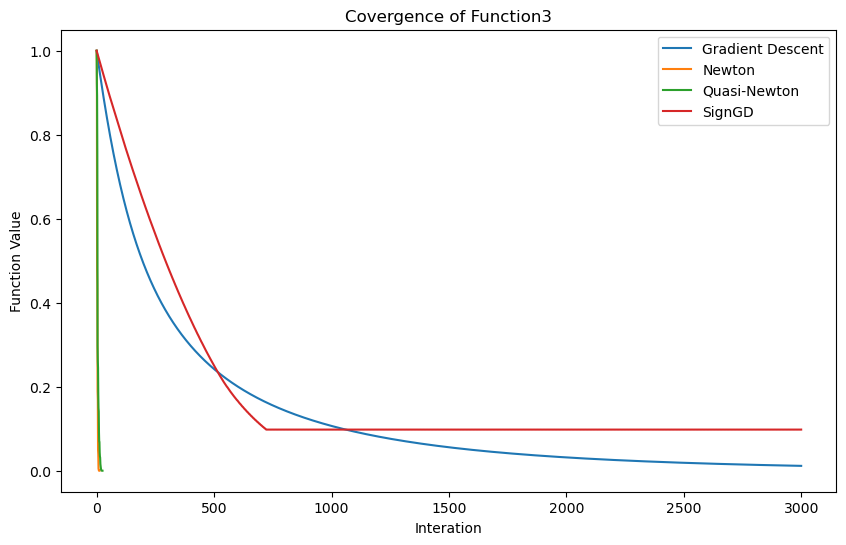

In [101]:
# ----- Function3 -----
gd_result_f3, gd_history_f3 = gradient_descent(
    function3, grad_function3, x0_f3, alpha=0.001, max_iter=3000
)
newton_result_f3, newton_history_f3 = newton_method(
    function3, grad_function3, hessian_function3, x0_f3, max_iter=500
)
quasi_newton_result_f3, quasi_newton_history_f3 = quasi_newton(
    function3, grad_function3, x0_f3, max_iter=500
)
signgd_result_f3, signgd_history_f3 = signgd(
    function3, grad_function3, x0_f3, alpha=0.001, max_iter=3000
)

print("Function3 Results:")
print("Gradient Descent:", gd_result_f3)
print("Newton:", newton_result_f3)
print("Quasi-Newton:", quasi_newton_result_f3)
print("SignGD:", signgd_result_f3)

plt.figure(figsize=(10, 6))
plt.plot(gd_history_f3, label="Gradient Descent")
plt.plot(newton_history_f3, label="Newton")
plt.plot(quasi_newton_history_f3, label="Quasi-Newton")
plt.plot(signgd_history_f3, label="SignGD")
plt.xlabel("Interation")
plt.ylabel("Function Value")
plt.title("Covergence of Function3")
plt.legend()
plt.show()